In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv(r"C:\Users\91876\Downloads\RS_Session_256_AU_95_C.csv")



In [2]:
# Drop the 'Grand Total' row as it is not required for analysis
df = df[df['State Name'] != 'Grand Total']

# Convert columns to numeric (except 'State Name')
numeric_columns = df.columns[1:]
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Perform EDA

# Summary statistics
print(df.describe())



        Two Wheeler  Three Wheeler  Four Wheeler  Goods Vehicles   
count     32.000000      28.000000      32.00000       28.000000  \
mean    8829.437500   23113.785714     822.96875      108.428571   
std    15027.420445   52178.963264    1661.50339      305.682167   
min        1.000000       1.000000       2.00000        1.000000   
25%       68.500000     136.000000      13.75000        3.000000   
50%     1984.500000    3674.000000     131.50000       17.000000   
75%    10306.500000   19470.250000     638.50000       37.000000   
max    56737.000000  257159.000000    7212.00000     1281.000000   

       Public Service Vehicle  Special Category Vehicles  Ambulance/Hearses   
count               24.000000                   9.000000           5.000000  \
mean                84.958333                  45.555556           1.200000   
std                182.408638                 112.373386           0.447214   
min                  1.000000                   1.000000           1.00

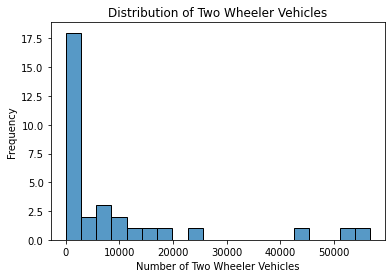

In [3]:
# Distribution of Two Wheeler vehicles
sns.histplot(df['Two Wheeler'].dropna(), bins=20)
plt.xlabel('Number of Two Wheeler Vehicles')
plt.ylabel('Frequency')
plt.title('Distribution of Two Wheeler Vehicles')
plt.show()

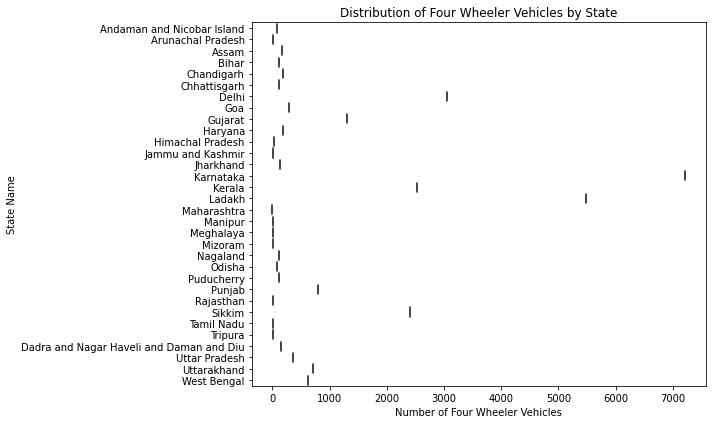

In [23]:
# Boxplot of Four Wheeler vehicles by State Name
plt.figure(figsize=(10, 6)) 
sns.boxplot(x='Four Wheeler', y='State Name', data=df)
plt.xlabel('Number of Four Wheeler Vehicles')
plt.ylabel('State Name')
plt.title('Distribution of Four Wheeler Vehicles by State')
plt.tight_layout()
plt.show()


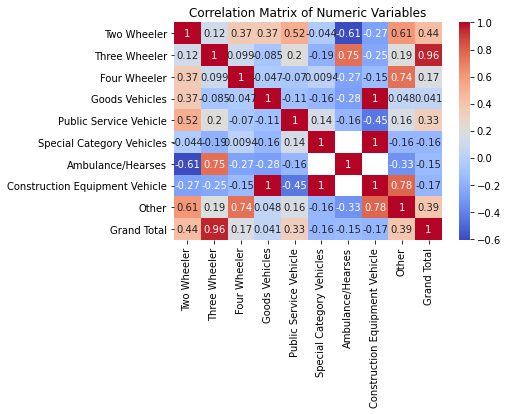

In [5]:
# Correlation matrix
correlation_matrix = df[numeric_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numeric Variables')
plt.show()

In [6]:
# Grouping by 'State Name' and calculating the total number of vehicles
grouped_df = df.groupby('State Name').sum()

# Sorting the DataFrame by the total number of vehicles in descending order
sorted_df = grouped_df.sort_values('Grand Total', ascending=False)

# Print the sorted DataFrame
print(sorted_df)

                                          Two Wheeler  Three Wheeler   
State Name                                                             
Uttar Pradesh                                   18295       257159.0  \
Delhi                                           14730       112831.0   
Karnataka                                       56737        16478.0   
Bihar                                            5003        59079.0   
Maharashtra                                     51149         6155.0   
Rajasthan                                       23446        29631.0   
Tamil Nadu                                      44302         4470.0   
Assam                                             721        47041.0   
West Bengal                                      2540        40948.0   
Haryana                                          7777        18595.0   
Uttarakhand                                      2614        22096.0   
Gujarat                                         13662         18

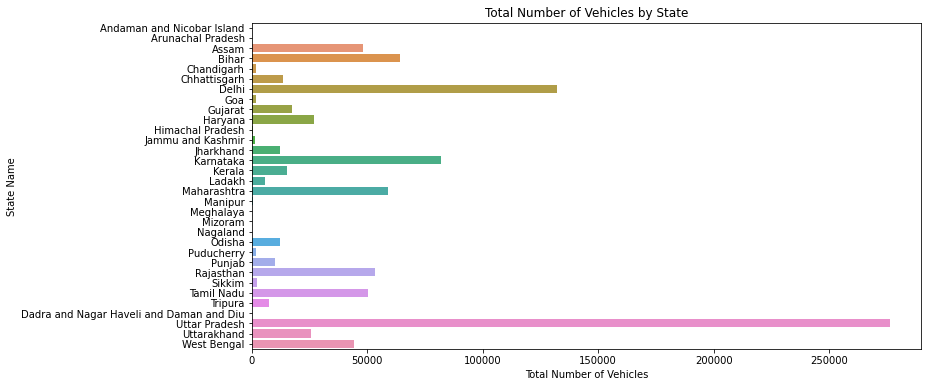

In [7]:
# Bar plot of the total number of vehicles by state
plt.figure(figsize=(12, 6))
sns.barplot(x='Grand Total', y='State Name', data=df)
plt.xlabel('Total Number of Vehicles')
plt.ylabel('State Name')
plt.title('Total Number of Vehicles by State')
plt.show()

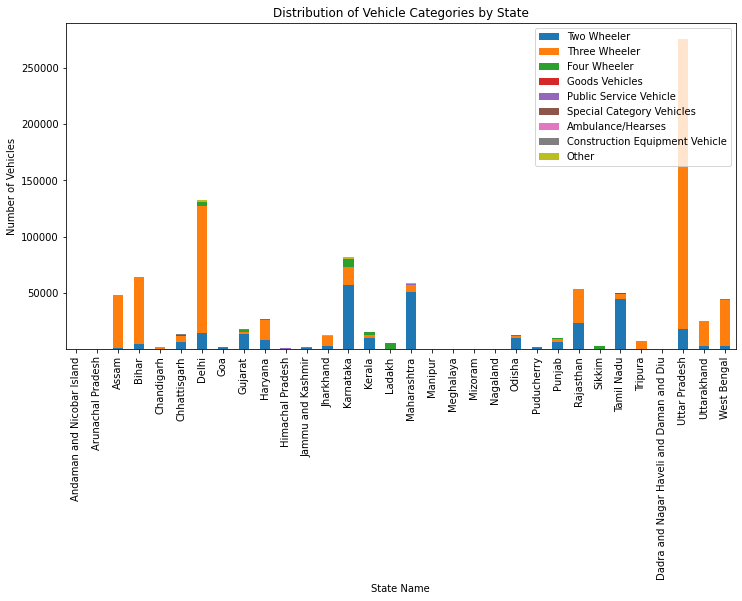

In [8]:
# Stacked bar plot of different vehicle categories by state
df_categories = df.drop(columns=['Grand Total'])
df_categories.set_index('State Name', inplace=True)
df_categories.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.xlabel('State Name')
plt.ylabel('Number of Vehicles')
plt.title('Distribution of Vehicle Categories by State')
plt.legend(loc='upper right')
plt.show()

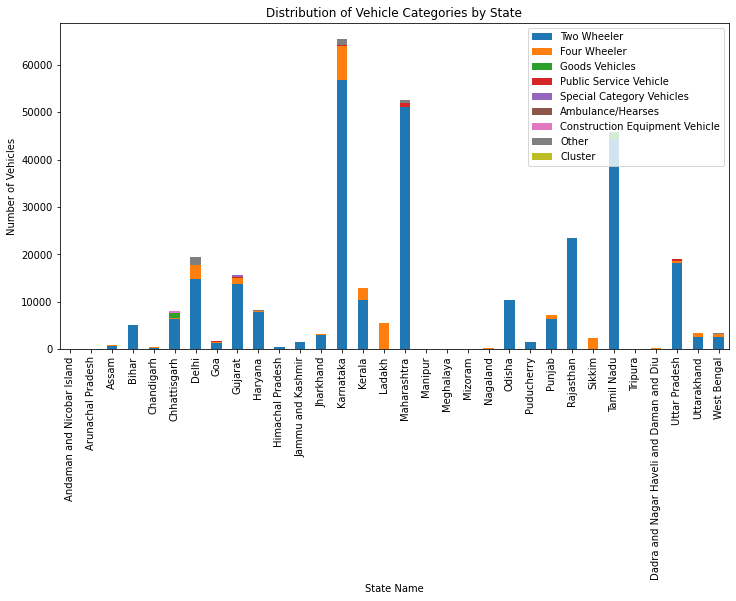

In [24]:
# Stacked bar plot of different vehicle categories by state
df_categories = df.drop(columns=['Grand Total','Three Wheeler'])
df_categories.set_index('State Name', inplace=True)
df_categories.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.xlabel('State Name')
plt.ylabel('Number of Vehicles')
plt.title('Distribution of Vehicle Categories by State')
plt.legend(loc='upper right')
plt.show()

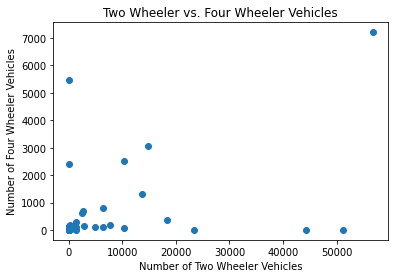

In [9]:
# Scatter plot of 'Two Wheeler' vs. 'Four Wheeler' vehicles
plt.scatter(df['Two Wheeler'], df['Four Wheeler'])
plt.xlabel('Number of Two Wheeler Vehicles')
plt.ylabel('Number of Four Wheeler Vehicles')
plt.title('Two Wheeler vs. Four Wheeler Vehicles')
plt.show()

In [10]:
# Filtering states with a high number of Three Wheeler vehicles
high_three_wheeler = df[df['Three Wheeler'] > 10000]
print(high_three_wheeler)

       State Name  Two Wheeler  Three Wheeler  Four Wheeler  Goods Vehicles   
2           Assam          721        47041.0           161             7.0  \
3           Bihar         5003        59079.0           114            11.0   
6           Delhi        14730       112831.0          3051            49.0   
9         Haryana         7777        18595.0           186           122.0   
13      Karnataka        56737        16478.0          7212           153.0   
24      Rajasthan        23446        29631.0            12            25.0   
29  Uttar Pradesh        18295       257159.0           368            53.0   
30    Uttarakhand         2614        22096.0           709             1.0   
31    West Bengal         2540        40948.0           615            28.0   

    Public Service Vehicle  Special Category Vehicles  Ambulance/Hearses   
2                     15.0                        NaN                NaN  \
3                     26.0                        NaN    

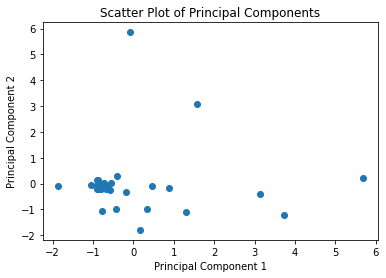

In [11]:
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Select the numerical columns for dimensionality reduction
numerical_columns = ['Two Wheeler', 'Three Wheeler', 'Four Wheeler', 'Goods Vehicles', 'Public Service Vehicle',
                     'Special Category Vehicles', 'Ambulance/Hearses', 'Construction Equipment Vehicle', 'Other']

# Create a subset DataFrame with numerical columns
numerical_df = df[numerical_columns]

# Perform imputation to handle missing values
imputer = SimpleImputer(strategy='mean')  # Use mean imputation, but you can choose a different strategy
imputed_data = imputer.fit_transform(numerical_df)

# Standardize the imputed data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(imputed_data)

# Perform PCA
pca = PCA(n_components=2)  # Specify the desired number of components
principal_components = pca.fit_transform(scaled_data)

# Create a new DataFrame with the principal components
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Concatenate the principal components with the State Name column for visualization
merged_df = pd.concat([df['State Name'], principal_df], axis=1)

# Scatter plot of the principal components
plt.scatter(merged_df['PC1'], merged_df['PC2'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Scatter Plot of Principal Components')
plt.show()

C:\Users\91876\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\91876\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


          Two Wheeler  Three Wheeler  Four Wheeler  Goods Vehicles   
Cluster                                                              
0        51149.000000    6155.000000       2.00000       30.000000  \
1         4044.444444   21822.217391     590.37037       19.391304   
2        35733.500000   64654.500000    5131.50000      101.000000   
3        25363.000000    4905.500000      65.00000     1179.000000   

         Public Service Vehicle  Special Category Vehicles  Ambulance/Hearses   
Cluster                                                                         
0                    851.000000                  26.000000           1.000000  \
1                     56.157895                  54.714286           1.333333   
2                     41.500000                   1.000000           1.000000   
3                     19.000000                        NaN                NaN   

         Construction Equipment Vehicle        Other  
Cluster                              

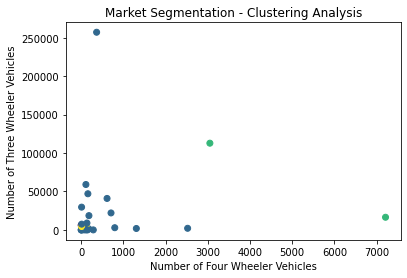

In [12]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Select the numerical columns for clustering
numerical_columns = ['Two Wheeler', 'Three Wheeler', 'Four Wheeler', 'Goods Vehicles', 'Public Service Vehicle',
                     'Special Category Vehicles', 'Ambulance/Hearses', 'Construction Equipment Vehicle', 'Other']

# Create a subset DataFrame with numerical columns
numerical_df = df[numerical_columns]

# Perform imputation to handle missing values
imputer = SimpleImputer(strategy='mean')  # Use mean imputation, but you can choose a different strategy
imputed_data = imputer.fit_transform(numerical_df)

# Standardize the imputed data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(imputed_data)

# Perform K-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)  # Specify the desired number of clusters
kmeans.fit(scaled_data)

# Add the cluster labels to the original DataFrame
df['Cluster'] = kmeans.labels_

# Analyze the characteristics of each cluster
cluster_summary = df.groupby('Cluster')[numerical_columns].mean()
print(cluster_summary)

# Plot the clusters on a scatter plot
plt.scatter(df['Four Wheeler'], df['Three Wheeler'], c=df['Cluster'], cmap='viridis')
plt.xlabel('Number of Four Wheeler Vehicles')
plt.ylabel('Number of Three Wheeler Vehicles')
plt.title('Market Segmentation - Clustering Analysis')
plt.show()

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler

# Select the numerical columns for clustering
numerical_columns = ['Two Wheeler', 'Three Wheeler', 'Four Wheeler', 'Goods Vehicles', 'Public Service Vehicle',
                     'Special Category Vehicles', 'Ambulance/Hearses', 'Construction Equipment Vehicle', 'Other']

# Create a subset DataFrame with numerical columns
numerical_df = df[numerical_columns]

# Handle missing or invalid values
numerical_df.replace([np.inf, -np.inf], np.nan, inplace=True)
numerical_df.dropna(inplace=True)

# Check if any samples remain after dropping missing or invalid values
if numerical_df.shape[0] > 0:
    # Standardize the data
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(numerical_df)

    # Perform linkage and create the dendrogram
    linked = linkage(scaled_data, method='ward')  # Choose the linkage method (e.g., 'ward', 'single', 'complete', etc.)
    dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)

    # Customize the plot
    plt.xlabel('Data Points')
    plt.ylabel('Distance')
    plt.title('Dendrogram Analysis')
    plt.show()
else:
    print("No samples remaining after handling missing or invalid values.")


No samples remaining after handling missing or invalid values.


<ipython-input-15-d0dd5ae7f70c>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numerical_df.replace([np.inf, -np.inf], np.nan, inplace=True)
<ipython-input-15-d0dd5ae7f70c>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numerical_df.dropna(inplace=True)


In [17]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Select the numerical columns for clustering
numerical_columns = ['Two Wheeler', 'Three Wheeler', 'Four Wheeler', 'Goods Vehicles', 'Public Service Vehicle',
                     'Special Category Vehicles', 'Ambulance/Hearses', 'Construction Equipment Vehicle', 'Other']

# Create a subset DataFrame with numerical columns
numerical_df = df[numerical_columns]

# Handle missing or invalid values
numerical_df.replace([np.inf, -np.inf], np.nan, inplace=True)
numerical_df.dropna(inplace=True)

# Check if any samples remain after dropping missing or invalid values
if numerical_df.shape[0] > 0:
    # Standardize the data
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(numerical_df)

    # Perform K-means clustering with a range of cluster numbers
    cluster_range = range(1, 11)  # Specify the range of cluster numbers to try
    inertia_values = []

    for num_clusters in cluster_range:
        kmeans = KMeans(n_clusters=num_clusters, random_state=42)
        kmeans.fit(scaled_data)
        inertia_values.append(kmeans.inertia_)

    # Plot the inertia values and identify the elbow point
    plt.plot(cluster_range, inertia_values, marker='o')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.title('Elbow Method')
    plt.show()
else:
    print("No samples remaining after handling missing or invalid values.")


No samples remaining after handling missing or invalid values.


<ipython-input-17-f9a8b3a438b6>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numerical_df.replace([np.inf, -np.inf], np.nan, inplace=True)
<ipython-input-17-f9a8b3a438b6>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numerical_df.dropna(inplace=True)


In [19]:
import pandas as pd
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Select the numerical columns for clustering
numerical_columns = ['Two Wheeler', 'Three Wheeler', 'Four Wheeler', 'Goods Vehicles', 'Public Service Vehicle',
                     'Special Category Vehicles', 'Ambulance/Hearses', 'Construction Equipment Vehicle', 'Other']

# Create a subset DataFrame with numerical columns
numerical_df = df[numerical_columns]

# Handle missing or invalid values
numerical_df.replace([np.inf, -np.inf], np.nan, inplace=True)
numerical_df.dropna(inplace=True)

# Check if any samples remain after dropping missing or invalid values
if numerical_df.shape[0] > 0:
    # Standardize the data
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(numerical_df)

    # Perform Gaussian Mixture Model (GMM) analysis
    n_components = 4  # Specify the desired number of components/clusters
    gmm = GaussianMixture(n_components=n_components, random_state=42)
    gmm.fit(scaled_data)

    # Get the predicted cluster labels
    cluster_labels = gmm.predict(scaled_data)

    # Add the cluster labels to the original DataFrame
    df['Cluster'] = cluster_labels

    # Plot the clusters on a scatter plot
    plt.scatter(df['Four Wheeler'], df['Three Wheeler'], c=df['Cluster'], cmap='viridis')
    plt.xlabel('Number of Four Wheeler Vehicles')
    plt.ylabel('Number of Three Wheeler Vehicles')
    plt.title('Gaussian Mixture Analysis')
    plt.show()
else:
    print("No samples remaining after handling missing or invalid values.")


No samples remaining after handling missing or invalid values.


<ipython-input-19-52a3741383a1>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numerical_df.replace([np.inf, -np.inf], np.nan, inplace=True)
<ipython-input-19-52a3741383a1>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numerical_df.dropna(inplace=True)
